In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Dataset**

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andonians/random-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/random-linear-regression


In [7]:
data=pd.read_csv('/kaggle/input/random-linear-regression/train.csv')

In [8]:
data.isnull().sum() #check is there is a nan value

,0
x,0
y,1


In [9]:
data=data.dropna() #remove the nan value

In [10]:
data.isnull().sum()

,0
x,0
y,0


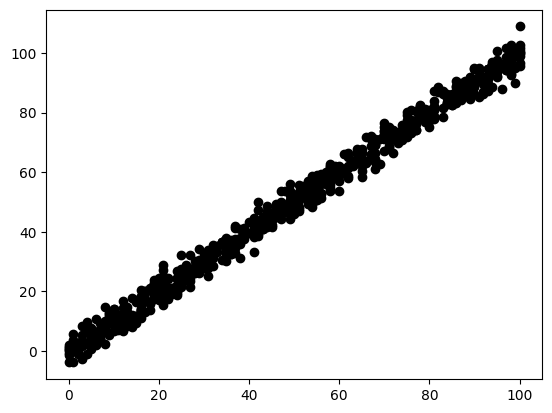

In [11]:
# Visualize the data
plt.scatter(data.x,data.y,color="black")
plt.show()

In [12]:
data.shape #check the shape of the data

(699, 2)

In [13]:
data.head(700).min()

,0
x,0.000000
y,-3.839981


In [14]:
data.head(700).max()

,0
x,100.000000
y,108.871618


 **Loss Function**


In [15]:
def loss_fn(m,b,points):
  errors=0 # total errors
  for i in range(len(points)):
    x=points.iloc[i].x #get the x value
    y=points.iloc[i].y #get the y value
    errors+=(y-(m*x+b))**2 # calc the MSE
  return errors/float(len(points)) # return the MSE

**Gradient Descent**

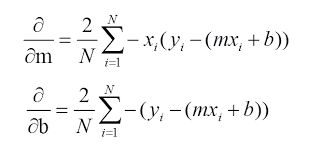

In [16]:
def gd(nm,nb,points,lr):
  m_gd=0 # initalize the new m(slope) with small value
  b_gd=0 # initaliez the new b(intersection of y-axis) with small value
  n=len(points) # number of points (x,y)

  # for each point update the new m & the new b
  for i in range(n):
    x=points.iloc[i].x
    y=points.iloc[i].y
    m_gd+=-(2/n)*(y-nm*x-nb)*x
    b_gd+=-(2/n)*(y-nm*x-nb)
  m = nm-m_gd*lr #assign the old m value with the new one
  b = nb-b_gd*lr #assign the old b value with the new one
  return m,b

**evaluate**

In [21]:
m=0 # initial value of m
b=0 # initial value of b
lr= 0.00001 # learning rate (small = better )
ephochs=200 # iterations over the dataset (points)

for i in range(ephochs):
  if i%50==0: # show the value of m,b every 50 ephocs
    print(f"Ephocs {i}:\n {m,b}")
  m,b=gd(m,b,data,lr)

print(f"Ephocs {ephochs}:\n {m,b}")

Ephocs 0:
 (0, 0)
Ephocs 50:
 (np.float64(0.9673097248861771), np.float64(0.014461352885175069))
Ephocs 100:
 (np.float64(0.997831665068291), np.float64(0.014887987025416556))
Ephocs 150:
 (np.float64(0.9987951672786042), np.float64(0.014871791527174896))
Ephocs 200:
 (np.float64(0.9988260128396307), np.float64(0.014841630872216611))


**Visualization**

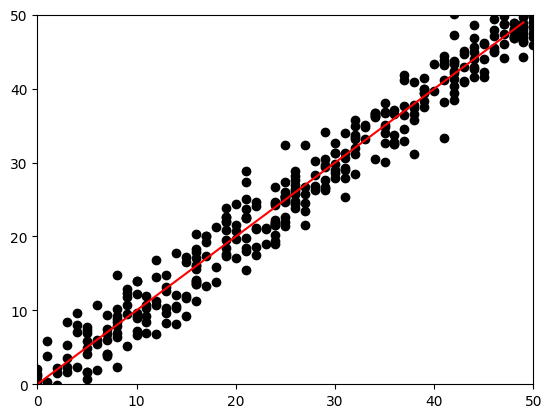

In [22]:
plt.scatter(data.x,data.y,color="black")
plt.plot(list(range(0,50)),[m*x+b for x in range(0,50)],color="red")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()